In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

import moords

In [2]:
columns = [
    "name",
    "type",
    "buoyancy_kg",
    "length_m",
    "width_m",
    "diameter_m",
    "drag",
    "material",
    "comment",
]
# Material number: 1: Steel, 2: Nylon, 3: Dacron, 4: Polyprop,
# 5: Polyethy, 6: Kevlar, 7: Aluminum, 8: Dyneema
rows = [
    ["3 Railway Wheels", "anchors", -1350.0, 0.55, 1.0, 0.0, 1.3, 1, ""],
    ["3/8 wire rope", "wires", -0.33, 1.0, 0.009, 0.0, 1.3, 1, ""],
    ["Zn Anode", "miscs", -0.05, 0.2, 0.025, 0.0, 1.3, 5, ""],
    ["41in ORE", "floats", 433.0, 1.04, 0.0, 1.04, 0.65, 1, ""],
    ["FLNTUSB", "miscs", -0.25, 0.31, 0.11, 0.0, 1.3, 5, ""],
    ["SBE39 T", "miscs", -0.25, 0.31, 0.11, 0.0, 1.3, 5, ""],
]
df_database = pd.DataFrame(rows, columns=columns).set_index("name")

Buoyancy check succesful


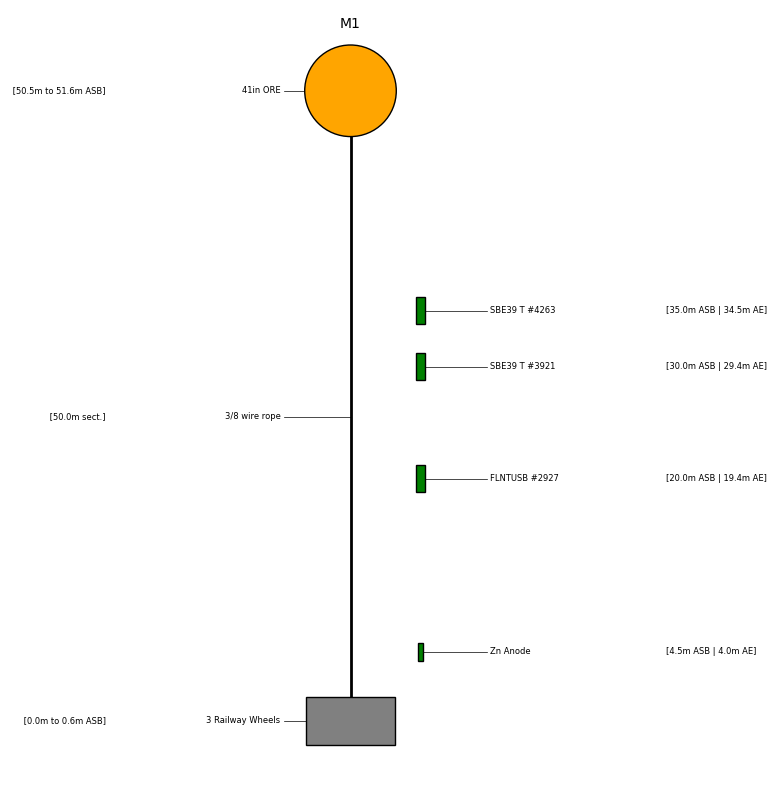

In [3]:
mooring = moords.Mooring(df_database, name="M1")  # Initialize mooring object

# In-line elements
mooring.add_inline("3 Railway Wheels")
mooring.add_inline("3/8 wire rope", line_length=50, section="A")
mooring.add_clampon_along_inline(
    "Zn Anode", height_along_inline=4
)  # attach clamp-on to latest in-line: 3/8 wire rope
mooring.add_inline("41in ORE")

# Add clamp-on elements by height (can be done after adding all in-line elements)
mooring.add_clampon_by_height("FLNTUSB", serial="2927", height=20)
mooring.add_clampon_by_height("SBE39 T", serial="3921", height=30)
mooring.add_clampon_by_height("SBE39 T", serial="4263", height=35)

mooring.check_total_buoyancy()  # Check the buoyancy of the mooring at the end

fig, ax = mooring.plot_design(label_rigging=True, line_ratio_plot=0.8)
plt.show()

Total Tension on Anchor = 416.0 kg
Vertical load = 416.0 kg
Horizontal load = 0.0 kg
Weight under anchor = -934.0 kg  (negative is down)


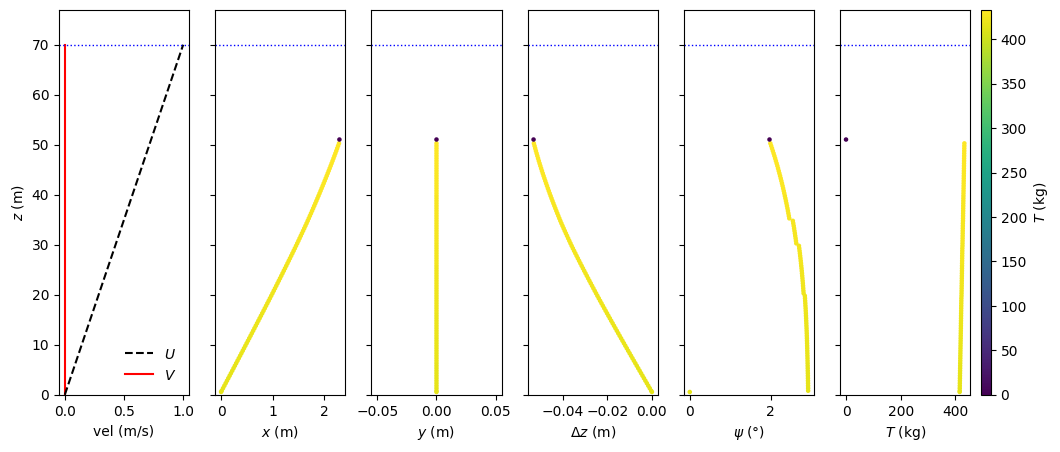

In [4]:
water_height = 70
z = np.linspace(0, water_height, 100)
ds_flow_instance = xr.Dataset(
    {
        "U": (["z"], z / water_height),
        "V": (["z"], np.zeros_like(z)),
        "W": (["z"], np.zeros_like(z)),
        "rho": (["z"], 1025 * np.ones_like(z)),
        "bottom_depth": water_height,
    },
    coords={"z": z},
)
instance = moords.SimulateInstance(mooring, ds_flow_instance)
instance.run()
fig, ax = instance.plot_instance()
plt.show()